In [8]:
# Import packages
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pylab
import mahotas as mh
import cv2

In [9]:
from Functions import create_dirs, mask_seg, count_animals,smooth_animals, get_centers, get_bboxes,write_file

In [10]:
# Create the data directories
create_dirs()

Creation of the directory ../Data/images/2019-10 failed
Creation of the directory ../Data/labels/2019-10 failed
Creation of the directory ../Data/semantic/2019-10 failed


In [11]:
input_location = "../Data/images/2019-10/"
input_location_s = "../Data/semantic/2019-10/"
output_location = "../Data/labels/2019-10/"


sigma = 2
size = 40
clean_distance = 10

IMG10_10,-20_.png


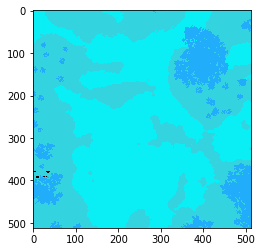

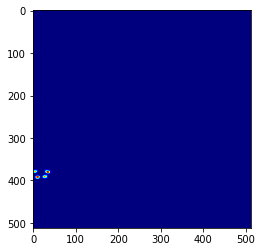

4
This image contains  4 animals


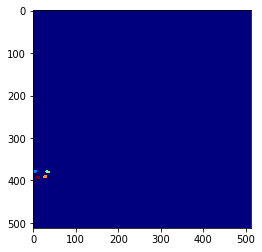

nr centers 4


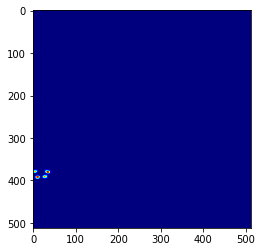

nr centers 4
[(0.009765625, 0.73828125), (0.068359375, 0.7421875), (0.052734375, 0.763671875), (0.01953125, 0.765625)]
IMG11_-20,-50_.png


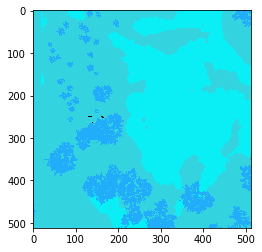

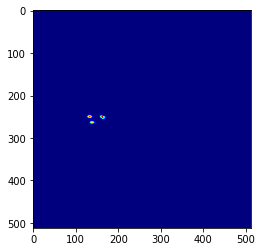

3
This image contains  3 animals


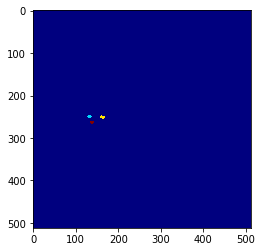

nr centers 3


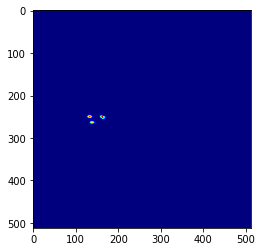

nr centers 3
[(0.259765625, 0.48828125), (0.318359375, 0.490234375), (0.271484375, 0.513671875)]
IMG12_-50,-50_.png


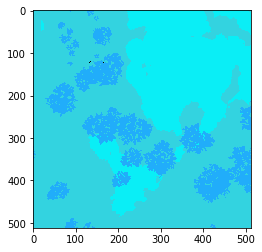

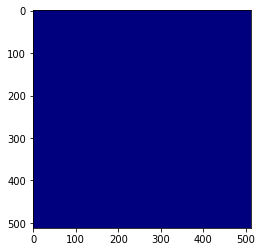

0
This image contains  0 animals


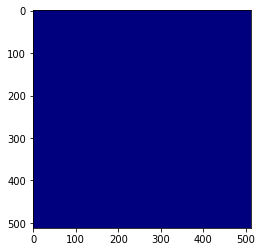

Zero animals in this picture, passing
IMG1_0,0_.png


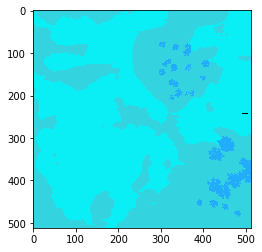

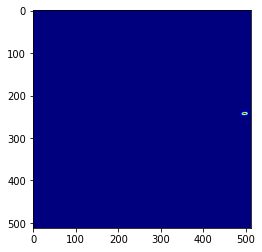

1
This image contains  1 animals


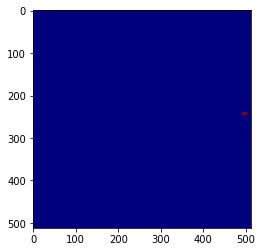

nr centers 2


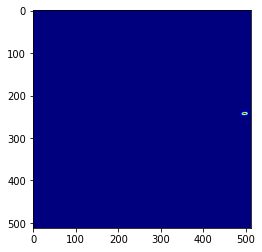

Multiple centers found, removing centers close together
498.0 497.0 and 242.0 243.0
nr centers 1
[(0.970703125, 0.474609375)]
IMG2_30,-30_.png


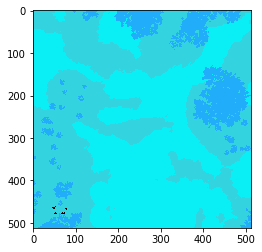

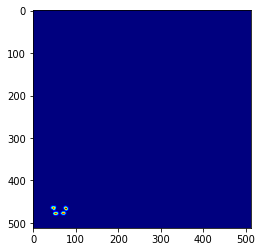

4
This image contains  4 animals


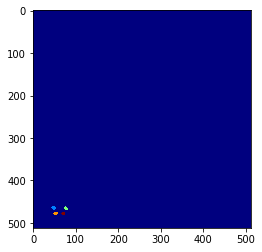

nr centers 4


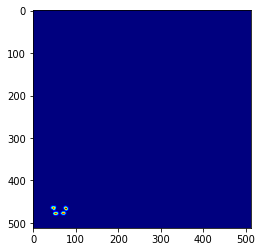

nr centers 4
[(0.09375, 0.90625), (0.150390625, 0.91015625), (0.138671875, 0.931640625), (0.103515625, 0.93359375)]
IMG3_60,-60_.png


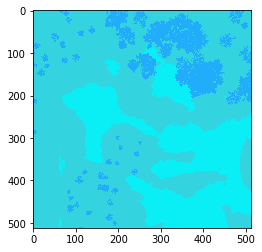

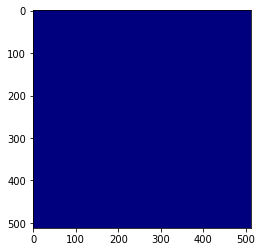

0
This image contains  0 animals


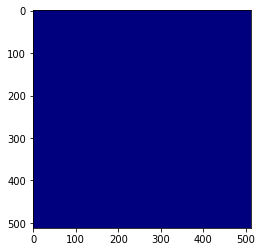

Zero animals in this picture, passing
IMG4_70,-80_.png


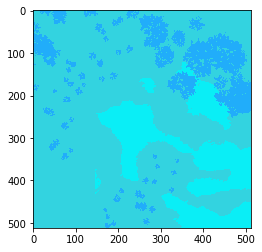

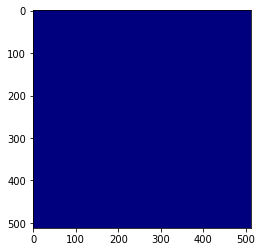

0
This image contains  0 animals


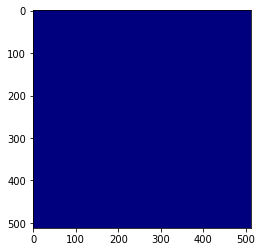

Zero animals in this picture, passing
IMG5_70,-50_.png


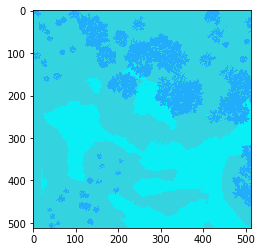

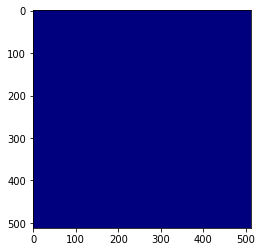

0
This image contains  0 animals


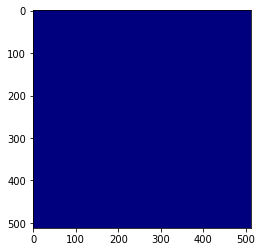

Zero animals in this picture, passing
IMG6_70,-20_.png


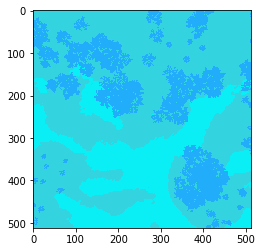

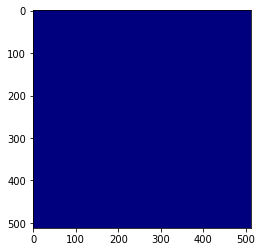

0
This image contains  0 animals


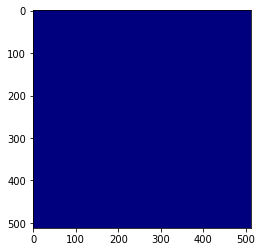

Zero animals in this picture, passing
IMG7_70,10_.png


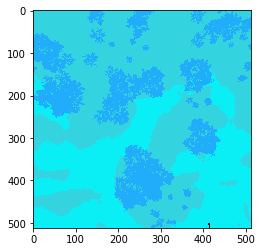

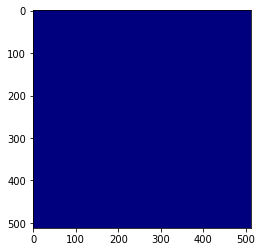

0
This image contains  0 animals


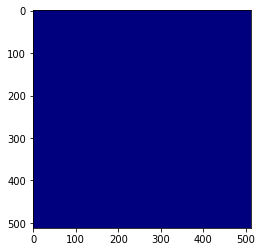

Zero animals in this picture, passing
IMG8_70,40_.png


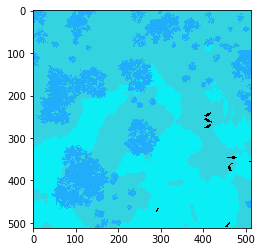

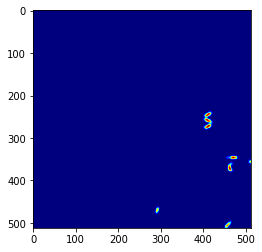

6
This image contains  6 animals


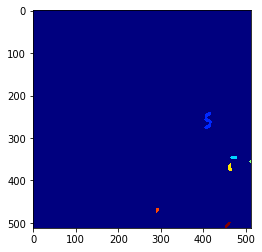

nr centers 16


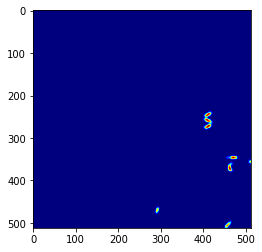

Multiple centers found, removing centers close together
412.0 411.0 and 244.0 245.0
Multiple centers found, removing centers close together
411.0 409.0 and 245.0 246.0
Multiple centers found, removing centers close together
409.0 408.0 and 246.0 247.0
Multiple centers found, removing centers close together
409.0 410.0 and 258.0 259.0
Multiple centers found, removing centers close together
411.0 410.0 and 272.0 273.0
Multiple centers found, removing centers close together
461.0 462.0 and 371.0 372.0
Multiple centers found, removing centers close together
292.0 291.0 and 469.0 470.0
Multiple centers found, removing centers close together
457.0 456.0 and 504.0 505.0
nr centers 8
[(0.796875, 0.482421875), (0.80078125, 0.505859375), (0.80078125, 0.533203125), (0.91796875, 0.67578125), (0.998046875, 0.6953125), (0.90234375, 0.7265625), (0.568359375, 0.91796875), (0.890625, 0.986328125)]
IMG9_40,10_.png


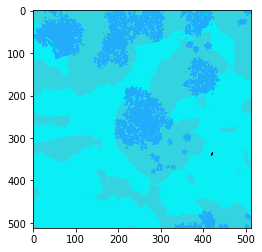

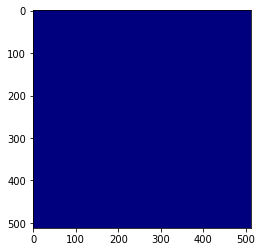

0
This image contains  0 animals


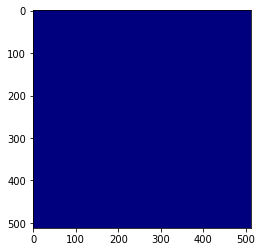

Zero animals in this picture, passing


In [12]:
with open("../Data/labels/00_SPLIT.txt","w") as file: 
    for image_name in os.listdir("../Data/semantic/2019-10/"):

        # Input image from directory
        print(image_name)
        input_location_s = "../Data/semantic/2019-10/"
        input_image_s = input_location_s + image_name

        # Write file name to 00_SPLIT.txt file
        file.write("2019-10/" + image_name + ' ' + "1")
        file.write("\n")

        # Mask everything but animals in image
        animals, mask = mask_seg(input_image_s)

        # Smooth animals with gaussian and remove tiny animals less than set size
        animals_smooth, T = smooth_animals(animals, sigma = sigma,size = size)

        # Count animals, if no animals are present, skip image
        labeled_animals, nr_objects = count_animals(animals_smooth, T)
        if nr_objects == 0:
            print("Zero animals in this picture, passing")
            continue

        # Get centers and bboxes of animals in image
        centers_list = get_centers(animals_smooth,clean_distance = clean_distance)
        bbox_list = get_bboxes(labeled_animals)

        # Output centers and bboxes
        bad_image_list = write_file(output_location,image_name,centers_list,bbox_list)


In [7]:
# Turn on to delete images that have innapropriate compositions in them
"""
print(bad_image_list)
for image in bad_image_list:
    os.remove("../Data/images/2019-10/" + image)
    os.remove("../Data/semantic/2019-10/" + image)
"""

['IMG8_70,40_.png']
